In [98]:
import Astraea
import pandas as pd
import numpy as np
from HeaderP import *

In [99]:
df_prot=pd.read_pickle('NewData/ProtVP_MS_150_w015_bin.pkl')
df_ruth=pd.read_csv("all_rvs.csv")
print(len(df_prot),len(df_ruth))

21370 35328


/Users/lucy/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [100]:
df_comp=pd.merge(df_ruth,df_prot,left_on='kepid',right_on='KID',how='inner')
df_comp

,Unnamed: 0,Unnamed: 0_x,kepid_x,Mass_berger,KIC,Kp,Q,Teff_santos,E_Teff,e_Teff,...,abs_G_y,dv_MAD,dv_STD,dv_MAD_err,age_STD,vd,vd_err,Rvar,age_y,age_err
0,0,2,1026474,0.669055,NaN,NaN,NaN,NaN,NaN,NaN,...,7.595345,23.995260,20.423772,0.378959,6.030264,42.239950,17.949421,67562.371492,10.327774,18.157580
1,2,4,1164102,0.633985,1164102.0,15.274,1-17,4203.0,126.0,139.0,...,7.570792,26.023469,21.573628,0.029400,6.362462,23.388488,0.803326,2368.494868,5.917678,0.789759
2,3,5,1292688,0.519125,1292688.0,15.823,1-17,3776.0,68.0,75.0,...,8.599282,30.270774,26.770944,0.035052,7.723052,21.163480,1.603520,3567.308187,5.385801,1.652506
3,4,6,1297303,0.669033,1297303.0,15.494,1-17,4451.0,121.0,134.0,...,7.055224,21.475267,17.909883,0.036277,5.254363,17.428481,0.648533,6550.490856,4.485449,0.615615
4,5,7,1429921,0.649537,1429921.0,15.828,1-17,4355.0,130.0,130.0,...,7.275167,19.243612,16.390262,0.012694,4.746714,17.655728,1.468746,14834.702015,4.540526,1.414068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19320,35321,38702,12884404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.555493,14.396775,12.944795,0.009007,3.456188,11.291429,0.411531,3858.101368,2.979966,0.392902
19321,35322,38703,12884566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.279711,16.292110,13.920041,0.003083,3.844226,12.923508,0.625622,3740.781546,3.384135,0.623697
19322,35323,38704,12884589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.635423,12.688373,11.583325,0.011533,2.877791,10.137677,0.408891,17142.558098,2.692226,0.401921
19323,35325,38706,12934465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.390409,22.803412,19.438000,0.016623,5.734632,17.438477,1.193422,3263.875842,4.487872,1.152306


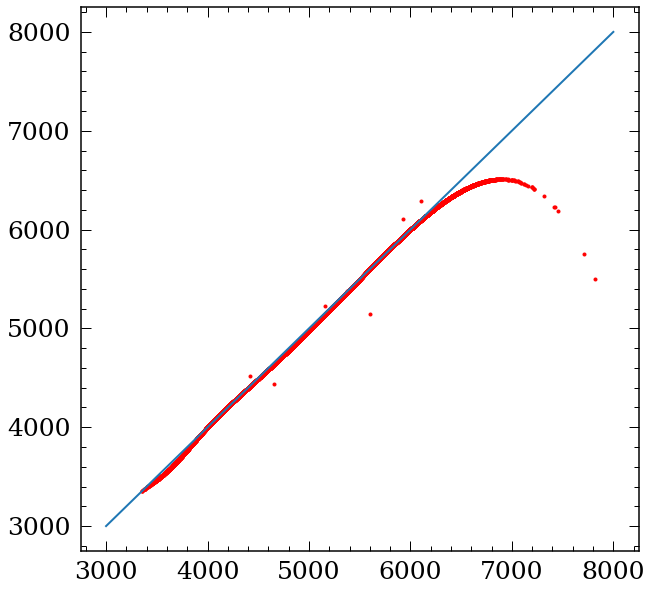

In [101]:
plt.plot(df_comp['color_teffs'],df_comp['teff_calc'],'r.')
plt.plot([3000,8000],[3000,8000])

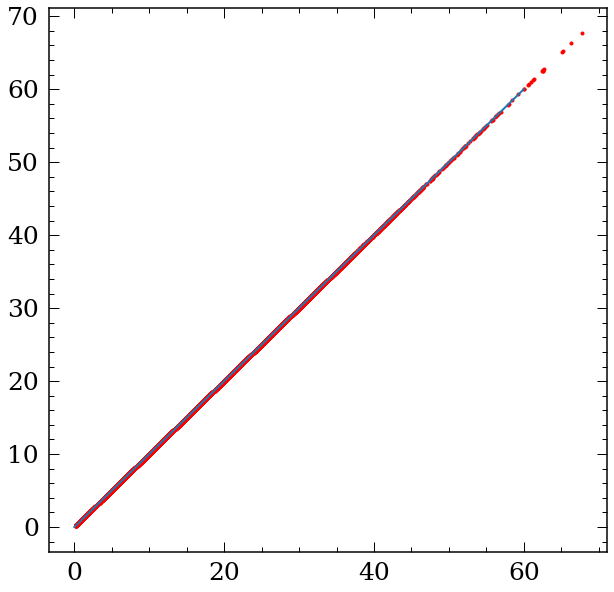

In [102]:
plt.plot(df_comp['Prot_x'],df_comp['Prot_y'],'r.')
plt.plot([0,60],[0,60])

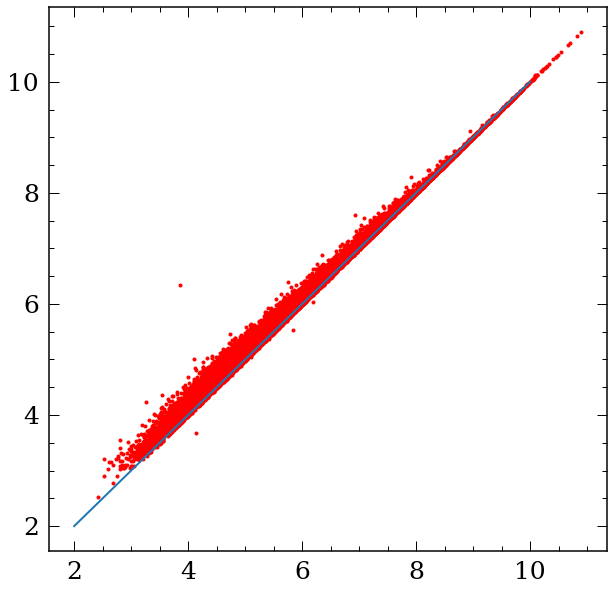

In [103]:
plt.plot(df_comp['abs_G_x'],df_comp['abs_G_y'],'r.')
plt.plot([2,10],[2,10])

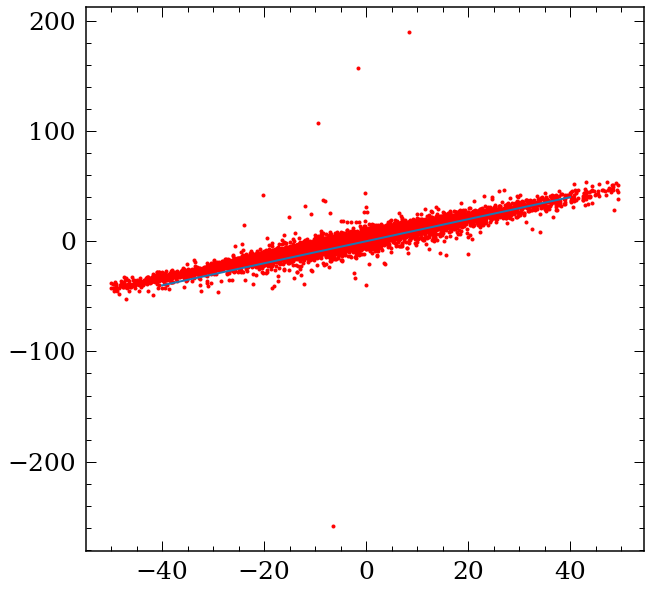

In [104]:
plt.plot(df_comp['v_b'],df_comp['all_vz'],'r.')
plt.plot([-40,40],[-40,40])

In [105]:
mpf = 'aviary/data/metal_poor_avr.csv'
mrf = 'aviary/data/metal_rich_avr.csv'
af = 'aviary/data/all_stars_avr.csv'
def get_avr_coefficients():
    """
    Fit the parameters of the AVR using data from Yu & Liu:
    https://arxiv.org/pdf/1712.03965.pdf
    Fit to the relationship between log(sigma_z) and age.
    Returns:
        p_mp (array): coefficients [slope, intercept] for straight line fit to
            metal poor stars.
        p_mr (array): coefficients [slope, intercept] for straight line fit to
            metal rich stars.
        p_a (array): coefficients [slope, intercept] for straight line fit to
            all stars.
    """
    mp = pd.read_csv(mpf)
    mr = pd.read_csv(mrf)
    a = pd.read_csv(af)

    p_mp = np.polyfit(np.log(mp.sigma_z_kms), np.log(mp.Age_Gyr), 1)
    p_mr = np.polyfit(np.log(mr.sigma_z_kms), np.log(mr.Age_Gyr), 1)
    p_a = np.polyfit(np.log(a.sigma_z_kms), np.log(a.Age_Gyr), 1)

    return p_mp, p_mr, p_a

def v_to_age(v, coeffs):
    """
    Convert z velocity dispersion [km/s] to age [Gyr]
    Args:
        v (array): Z Velocity dispersion [km/s].
        coeffs (array): coefficients for straight line fit. [intercept, slope]
    Returns:
        age (array): age in Gyr.
    """
    b, a = coeffs
    logt = np.polyval(coeffs, np.log(v))
    return np.exp(logt)

def genErr(dv, dv_err):
    errorRand=np.random.normal(0, 1, len(dv))
    return dv+dv_err*errorRand

In [106]:
import time
from tqdm import trange
# get average ages
def getAveAges(df,fs,binfs,vb):
    
    fslen=len(fs)
    dflen=len(df)
    
    checkpara=np.zeros(fslen)
    paras=np.zeros((dflen,fslen))
    for i in range(fslen):
        paras[:,i]=df[fs[i]].values
    
    iso_age=df['iso_age'].values
    iso_age_err=df['iso_age_err1'].values
    
    iso_ave=np.zeros(len(df))
    iso_ave_err=np.zeros(len(df))
    
    vels=df[vb].values
    kin_age=np.zeros(len(df))
    
    for i in trange(dflen):
        
        mask=np.ones(dflen, dtype=bool)
        
        for j in range(fslen):
            checkpara[j]=paras[i,j]
            mask = mask & (abs(paras[:,j]-checkpara[j])<binfs[j]/2)
            #mask = mask & (paras[:,j]>=checkpara[j]-binfs[j]/2)
            #mask = mask & (paras[:,j]<=checkpara[j]+binfs[j]/2)
        
        iso_age_single=iso_age[mask]
        iso_age_err_single=iso_age_err[mask]
        
        weights=1/np.power(iso_age_err_single,2)
        iso_ave[i]=sum((iso_age_single*weights)/sum(weights))
        iso_ave_err[i]=np.sqrt(sum(iso_age_err_single)**2)
        
        vels_single=vels[mask]
        
        kin_age[i]=1.5*np.median(abs(vels_single-np.median(vels_single)))
        
        
    p_mp, p_mr, p_a = get_avr_coefficients()
    df['kin_age']=v_to_age(kin_age,p_mr)
    df['iso_age_ave']=iso_ave
    df['iso_age_ave_err']=iso_ave_err

    

In [107]:
import time
from tqdm import trange
# get average ages
def getkinAges(df,fs,binfs,vb):
    
    fslen=len(fs)
    dflen=len(df)
    
    checkpara=np.zeros(fslen)
    paras=np.zeros((dflen,fslen))
    for i in range(fslen):
        paras[:,i]=df[fs[i]].values
    
    vels=df[vb].values
    kin_age=np.zeros(len(df))
    
    for i in trange(dflen):
        
        mask=np.ones(dflen, dtype=bool)
        
        for j in range(fslen):
            checkpara[j]=paras[i,j]
            mask = mask & (abs(paras[:,j]-checkpara[j])<binfs[j]/2)
        vels_single=vels[mask]
        
        kin_age[i]=1.5*np.median(abs(vels_single-np.median(vels_single)))
        
        
    p_mp, p_mr, p_a = get_avr_coefficients()
    df['kin_age']=v_to_age(kin_age,p_mr)

    

In [108]:
df_isoages=pd.read_table('GKSPCPapTable2.txt',delimiter='&')
df_ruth=pd.merge(df_isoages,df_ruth,left_on='KIC',right_on='kepid',how='inner')


In [109]:
df_ruth['Prot_log']=np.log10(df_ruth['Prot'])
getkinAges(df_ruth,['color_teffs','Prot_log','abs_G'],[100.,0.3,0.4],'all_vz')

  0%|          | 0/34237 [00:00<?, ?it/s]/Users/lucy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in less
/Users/lucy/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/lucy/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 34237/34237 [00:15<00:00, 2238.00it/s]
/Users/lucy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log
/Users/lucy/anaconda3/lib/python3.7/site-packages/numpy/lib/polynomial.py:675: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]


Text(0, 0.5, 'iso_age')

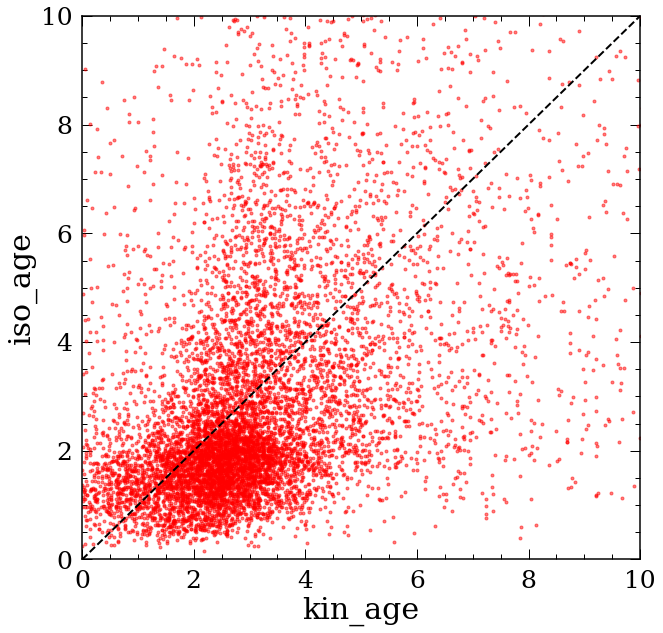

In [110]:
df_ruth_plot=df_ruth.loc[df_ruth['iso_age_err1']<3]
plt.plot(df_ruth_plot['kin_age'],df_ruth_plot['iso_age'],'r.',alpha=0.5)
plt.plot([0,10],[0,10],'k--')
plt.xlim([0,10])
plt.ylim([0,10])
plt.xlabel('kin_age')
plt.ylabel('iso_age')

In [111]:
df_ruth.loc[df_ruth['kepid']==12456401]['kin_age']

33921    4.332091
Name: kin_age, dtype: float64

In [112]:
df_prot=pd.merge(df_isoages,df_prot,left_on='KIC',right_on='KID',how='inner')

In [115]:
df_prot['Prot_log']=np.log10(df_prot['Prot'])
getkinAges(df_prot,['teff_calc','Prot_log','abs_G','logg_y'],[233.,2,0.05,0.4],'v_b')

100%|██████████| 20798/20798 [00:08<00:00, 2598.85it/s]
/Users/lucy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log
/Users/lucy/anaconda3/lib/python3.7/site-packages/numpy/lib/polynomial.py:675: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]


Text(0, 0.5, 'iso_age')

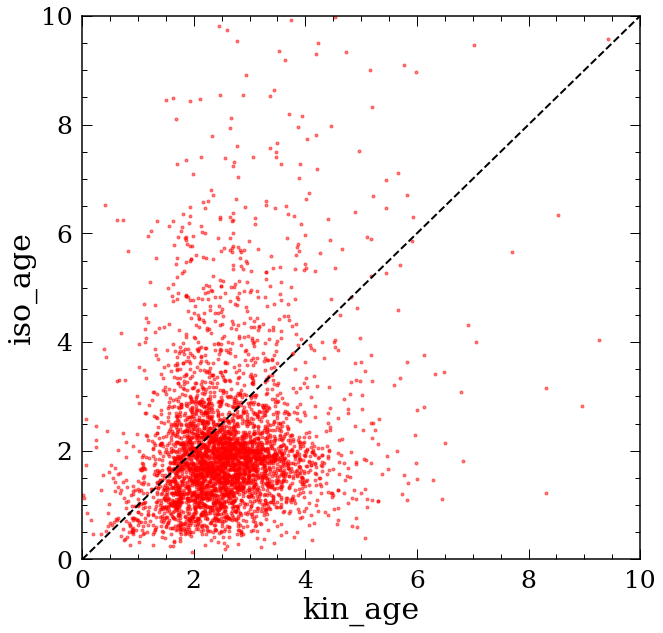

In [116]:
df_prot_plot=df_prot.loc[df_prot['iso_age_err1']<3]
plt.plot(df_prot_plot['kin_age'],df_prot_plot['iso_age'],'r.',alpha=0.5)
plt.plot([0,10],[0,10],'k--')
plt.xlim([0,10])
plt.ylim([0,10])
plt.xlabel('kin_age')
plt.ylabel('iso_age')

In [119]:
df_prot.loc[df_prot['KID']==12456401]['kin_age']

20602    2.338033
Name: kin_age, dtype: float64

# average

In [124]:
getAveAges(df_prot,['teff_calc','Prot_log','abs_G','logg_y'],[366.6666666666667, 2.0, 0.01,0.5499999999999999],'v_b')



100%|██████████| 20798/20798 [00:07<00:00, 2870.26it/s]
/Users/lucy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log
/Users/lucy/anaconda3/lib/python3.7/site-packages/numpy/lib/polynomial.py:675: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]


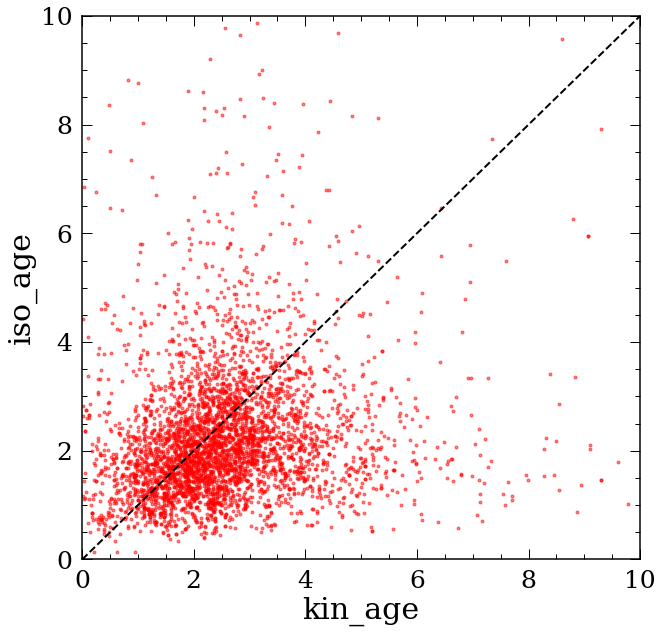

In [127]:
df_prot_plot=df_prot.loc[df_prot['iso_age_err1']<3]
plt.plot(df_prot_plot['kin_age'],df_prot_plot['iso_age_ave'],'r.',alpha=0.5)
plt.plot([0,10],[0,10],'k--')
plt.xlim([0,10])
plt.ylim([0,10])
plt.xlabel('kin_age')
plt.ylabel('iso_age')

#df_prot_plot.to_pickle('XD.pkl')
plt.savefig('FinalOpt.png')

In [122]:
df_prot_plot

,KIC,iso_mass,iso_mass_err1,iso_mass_err2,iso_teff,iso_teff_err1,iso_teff_err2,iso_logg,iso_logg_err1,iso_logg_err2,...,dv_MAD_err,age_STD,vd,vd_err,Rvar,age,age_err,kin_age,iso_age_ave,iso_age_ave_err
10,1161620,1.025,0.027,-0.035,5861.9,92.3,-85.3,4.485,0.013,-0.020,...,0.008719,3.293788,8.878706,0.626967,14154.037833,2.376060,0.602828,1.700889,2.683026,406.01
28,1429977,0.799,0.038,-0.028,5280.7,105.6,-92.7,4.419,0.034,-0.029,...,0.031770,3.681321,13.489342,0.561609,2854.239941,3.523549,0.566963,2.447823,4.639154,839.87
44,1570150,1.101,0.030,-0.037,6315.1,118.8,-134.3,4.433,0.016,-0.019,...,0.005025,3.329231,8.165083,1.575117,15595.072508,2.195713,1.544532,2.596800,1.575824,129.36
46,1570924,0.782,0.025,-0.018,4845.6,75.8,-68.6,4.498,0.020,-0.014,...,0.392533,-0.334744,9.230322,3.770303,95169.138908,2.464608,3.859336,2.448733,9.493352,410.26
61,1718354,1.416,0.069,-0.064,6926.4,144.9,-146.1,4.045,0.036,-0.036,...,0.018720,3.132147,3.054478,1.815616,1276.013255,0.869520,1.858253,NaN,1.740000,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20764,12736205,1.131,0.044,-0.056,6119.7,104.0,-103.3,4.394,0.024,-0.034,...,0.053416,3.252635,9.737748,0.967048,3940.010071,2.592052,0.915544,1.745030,1.542734,139.73
20770,12737192,0.977,0.031,-0.042,5782.5,91.1,-91.2,4.502,0.016,-0.026,...,0.010380,3.223496,11.507667,0.585777,4244.238138,3.033700,0.571947,2.461190,2.808066,540.42
20774,12783643,1.134,0.081,-0.087,6136.8,165.6,-147.8,4.310,0.036,-0.038,...,0.079510,3.175137,9.812297,0.789433,2489.155531,2.610743,0.809905,1.012689,0.946829,74.38
20789,12884404,1.051,0.062,-0.075,5945.6,127.8,-149.6,4.400,0.036,-0.045,...,0.009007,3.456188,11.291429,0.411531,3858.101368,2.979966,0.392902,2.759513,4.450817,194.15
